<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# installing a specific tensorflow version
!pip install tensorflow==2.15.0 -q -user


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [2]:
# checking if the specified version is installed
import tensorflow as tf
tf.__version__

'2.15.0'

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout


# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

from tensorflow.keras import losses
from tensorflow.keras.losses import BinaryCrossentropy

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
ds = pd.read_csv("Churn.csv")    # complete the code to load the dataset

## Data Overview

### View the first and last 5 rows of the dataset.

In [6]:
# let's view the first 5 rows of the data
ds.head() ##  Complete the code to view top 5 rows of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# let's view the last 5 rows of the data
ds.tail() ##  Complete the code to view last 5 rows of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [8]:
# Checking the number of rows and columns in the training data
ds.shape ##  Complete the code to view dimensions of the train data

(10000, 14)

### Check the data types of the columns for the dataset

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the Statistical Summary

In [10]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
ds['CreditScore'].mean()

650.5288

### Checking for Missing Values

In [12]:
# let's check for missing values in the data
ds.isnull().sum() ##  Complete the code to check missing entries in the train data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
ds.duplicated().sum() #

0

In [14]:
Q1 = ds.quantile(0.25)  # To find the 25th percentile
Q3 = ds.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [15]:
# checking the % outliers
((ds.select_dtypes(include=["float64", "int64"]) < lower) | (ds.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(ds) * 100

RowNumber           0.00
CustomerId          0.00
CreditScore         0.15
Age                 3.59
Tenure              0.00
Balance             0.00
NumOfProducts       0.60
HasCrCard           0.00
IsActiveMember      0.00
EstimatedSalary     0.00
Exited             20.37
dtype: float64

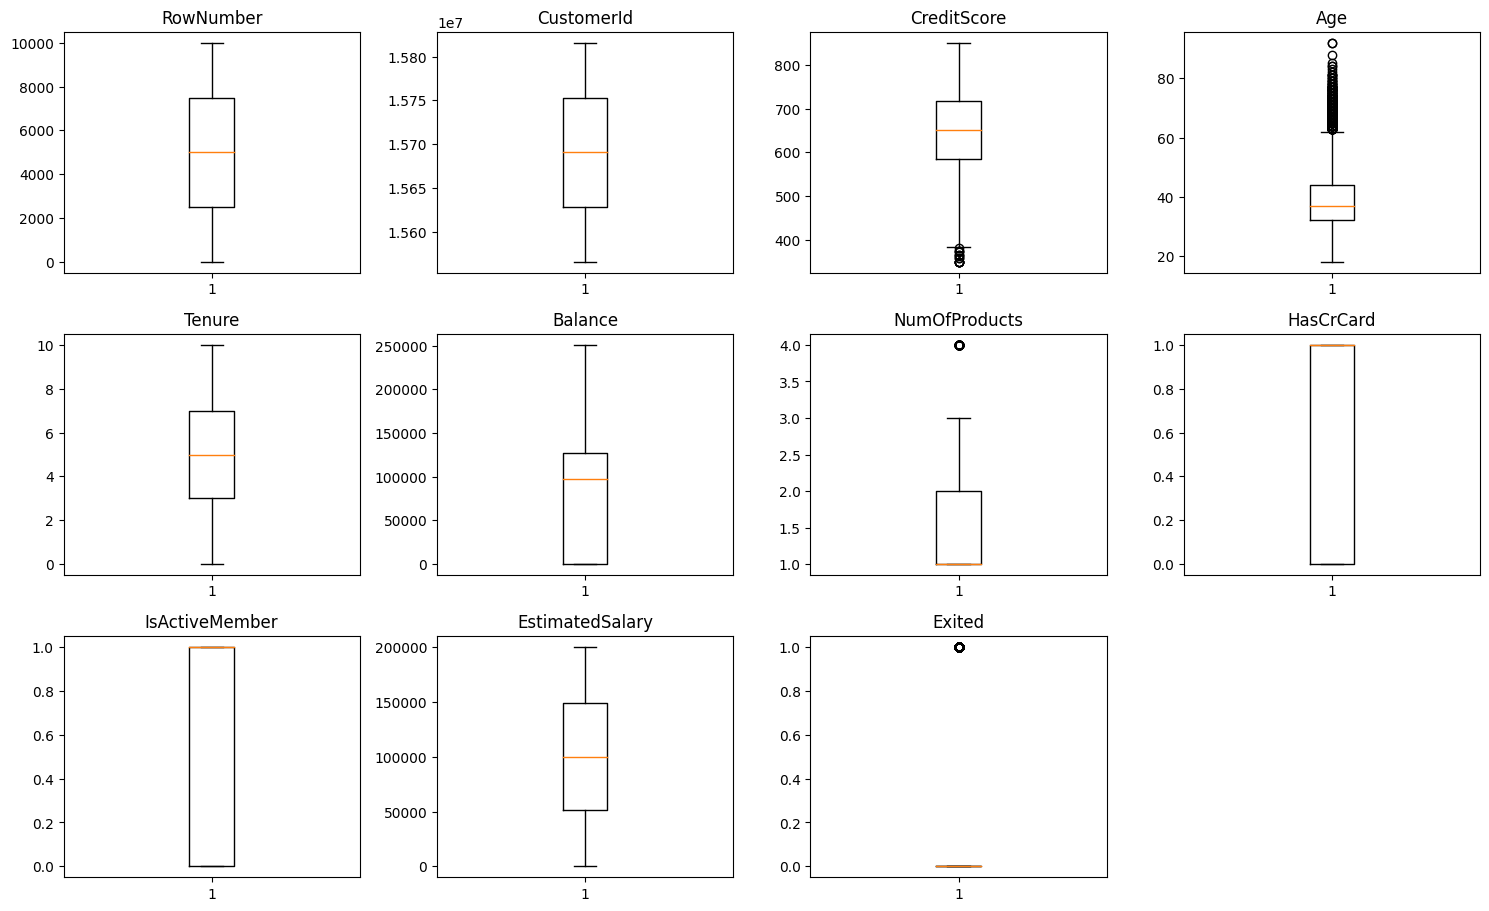

In [16]:
# outlier detection using boxplot
numeric_columns = ds.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(ds[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Checking for unique values for each of the column

In [17]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [18]:
data = ds.copy()
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

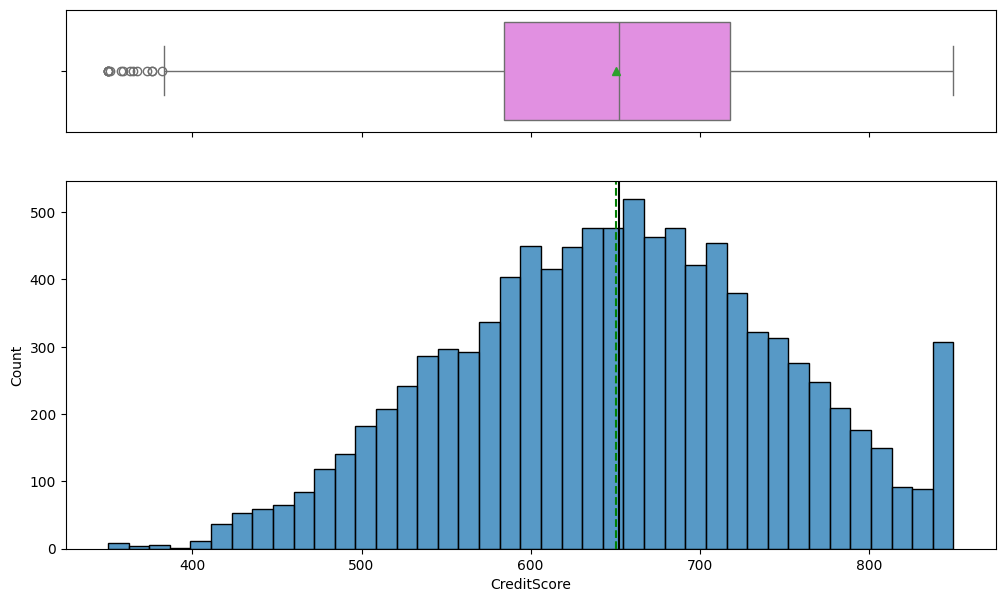

In [22]:
histogram_boxplot(ds,'CreditScore')

#### Observations on Age

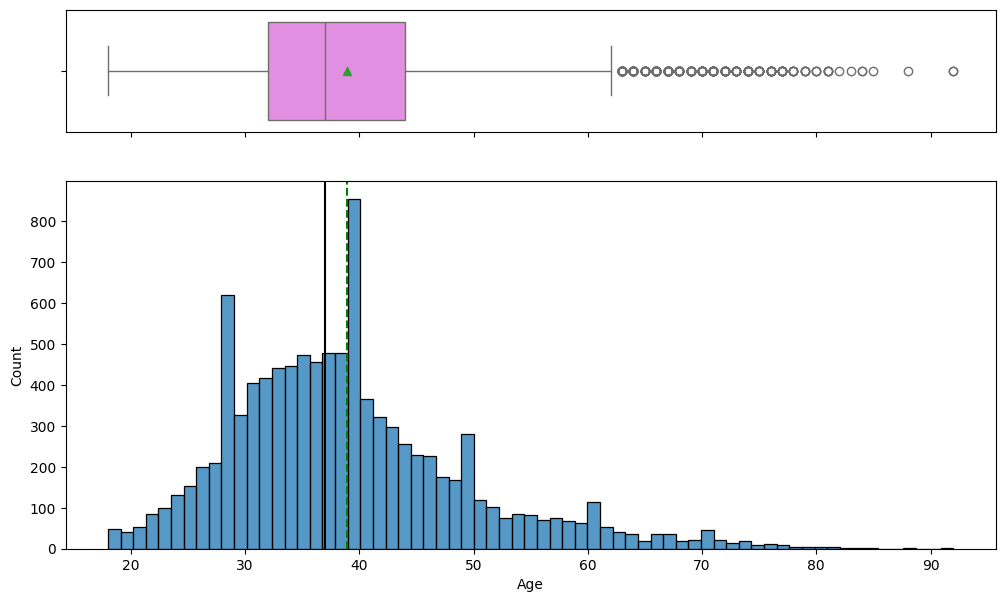

In [23]:
histogram_boxplot(ds,'Age')          ## Complete the code to create histogram_boxplot for Age

#### Observations on Balance

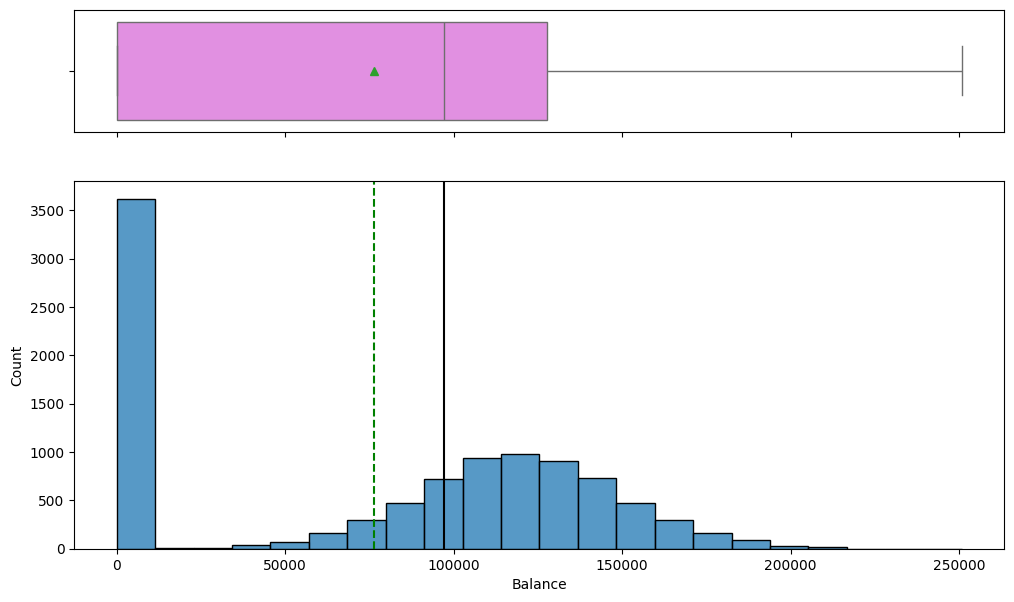

In [24]:
histogram_boxplot(ds,'Balance')          ## Complete the code to create histogram_boxplot for Balance

#### Observations on Estimated Salary

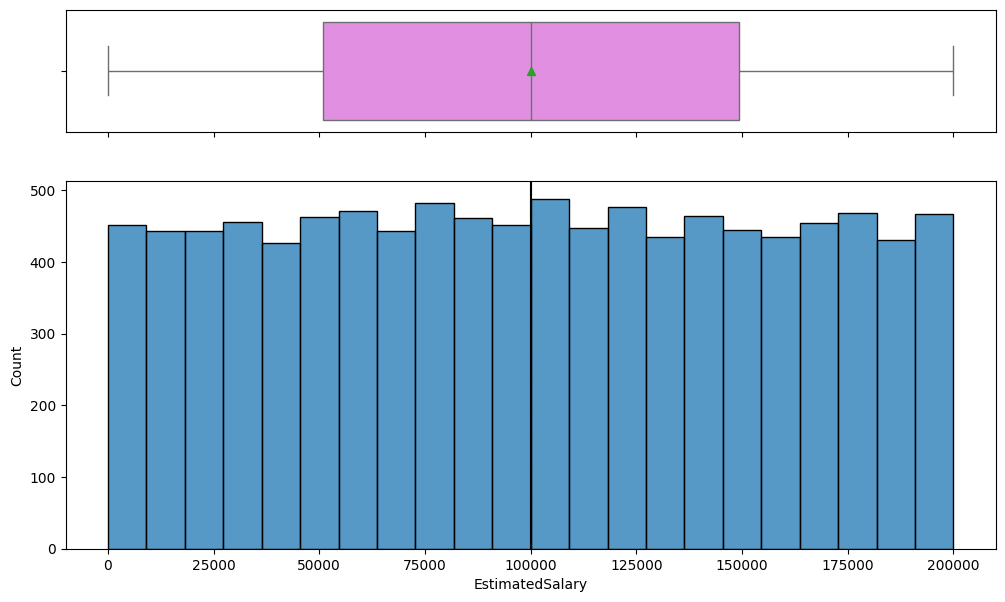

In [25]:
histogram_boxplot(ds,'EstimatedSalary')          ## Complete the code to create histogram_boxplot for Estimated Salary

#### Observations on Exited

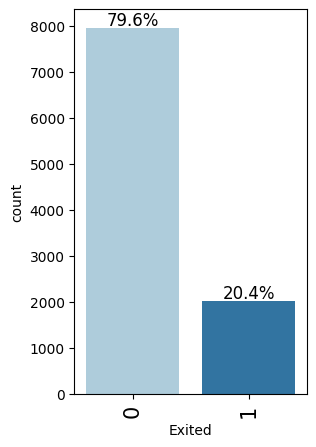

In [26]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations on Geography

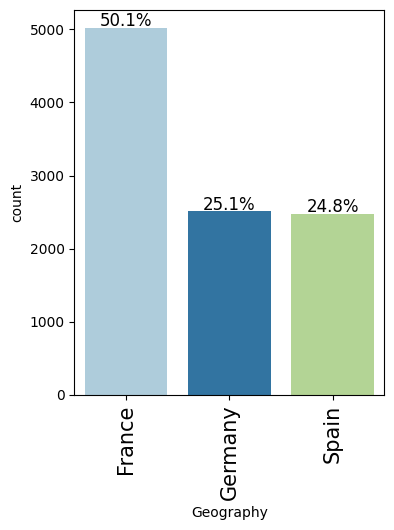

In [27]:
labeled_barplot(ds, "Geography", perc=True)               ## Complete the code to create labeled_barplot for Geography

#### Observations on Gender

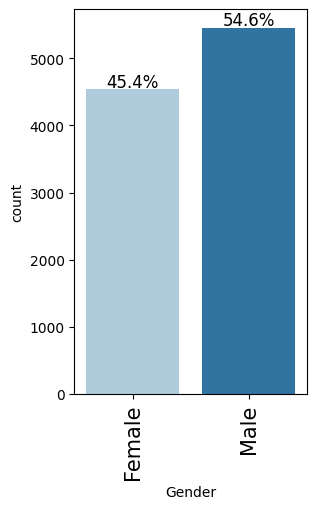

In [28]:
labeled_barplot(ds, "Gender", perc=True)               ## Complete the code to create labeled_barplot for Gender

#### Observations on Tenure

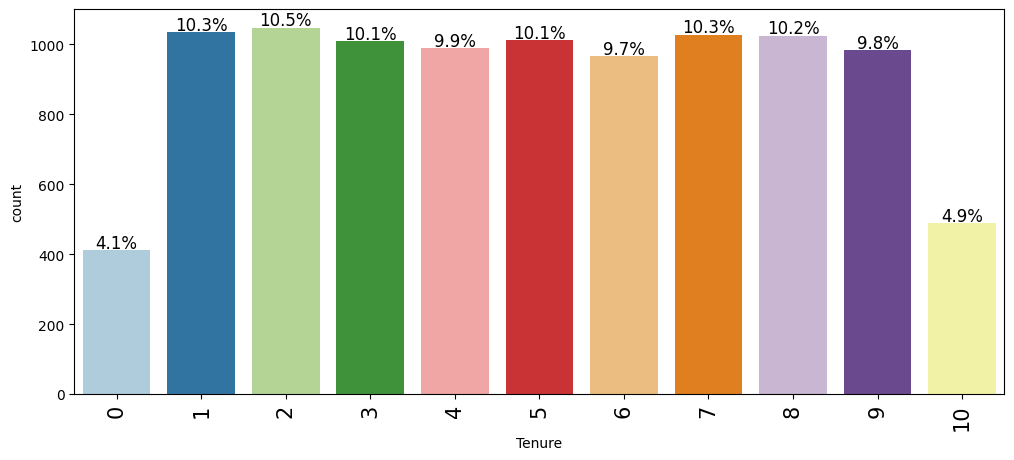

In [29]:
labeled_barplot(ds, "Tenure", perc=True)               ## Complete the code to create labeled_barplot for Tenure

#### Observations on Number of Products

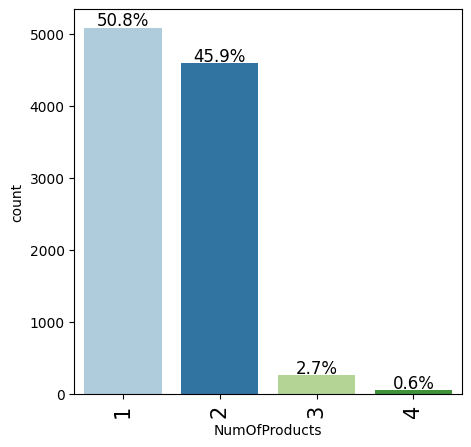

In [30]:
labeled_barplot(ds,'NumOfProducts',perc=True)               ## Complete the code to create labeled_barplot for Number of products

#### Observations on Has Credit Card

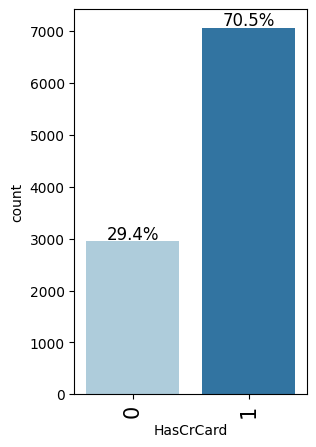

In [31]:
labeled_barplot(ds,'HasCrCard', perc=True)   ## Complete the code to create labeled_barplot for Has credit card

#### Observations on Is Active Member

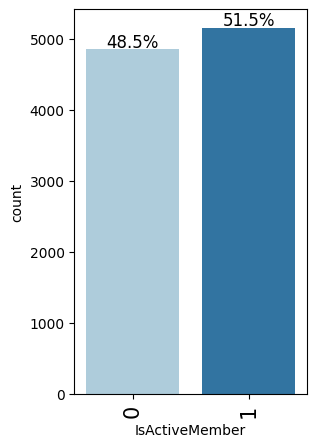

In [32]:
labeled_barplot(ds,'IsActiveMember', perc=True)            ## Complete the code to create labeled_barplot for Is active member

### Bivariate Analysis

In [33]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

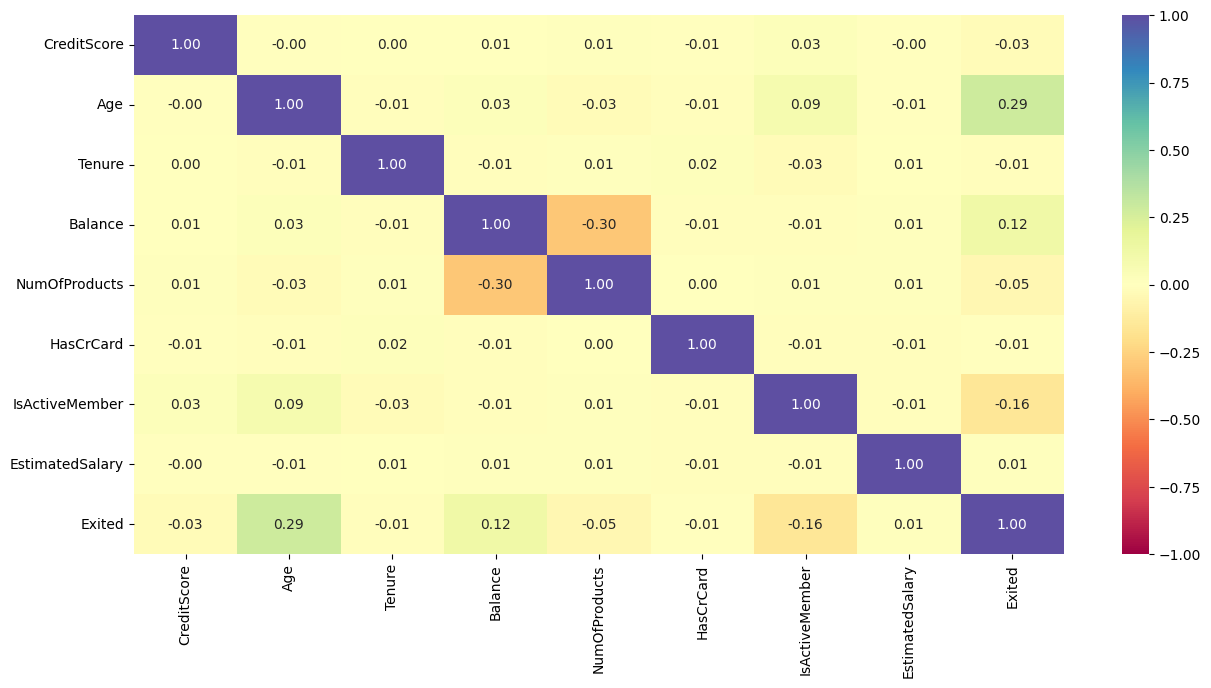

In [34]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          # Complete the code to get the heatmap of the data
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


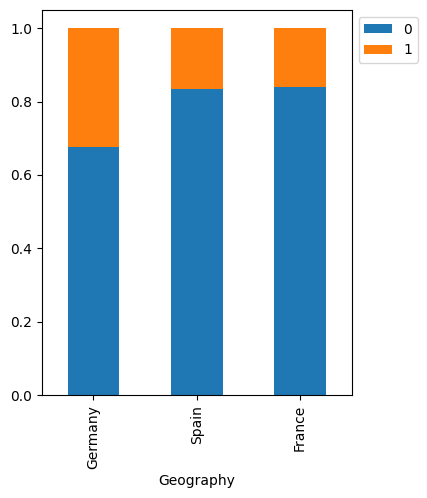

In [35]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


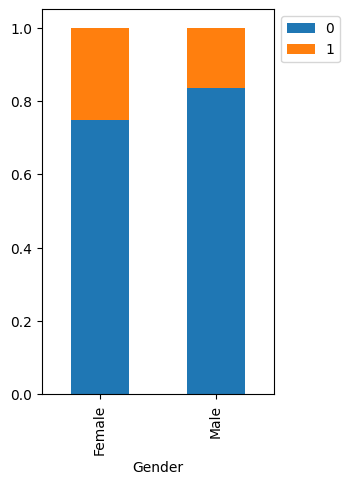

In [36]:
stacked_barplot(ds, "Gender", "Exited")                   ## Complete the code to plot stacked barplot for Exited and Gender

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


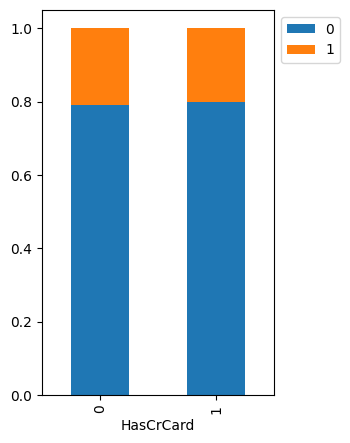

In [37]:
stacked_barplot(ds, "HasCrCard", "Exited")                   ## Complete the code to plot stacked barplot for Exited and Has credit card

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


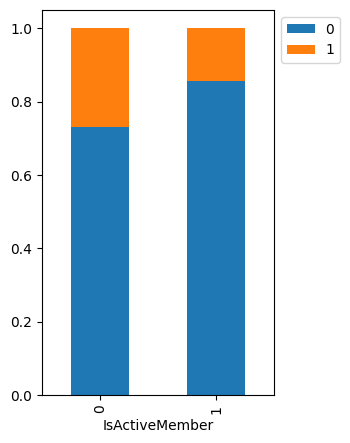

In [38]:
stacked_barplot(ds, "IsActiveMember", "Exited")                   ## Complete the code to plot stacked barplot for Exited and Is active member

#### Exited Vs Credit Score

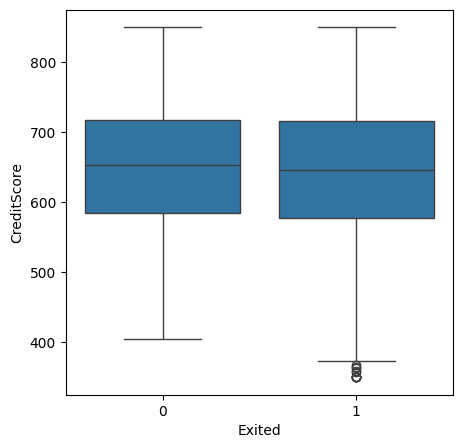

In [39]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

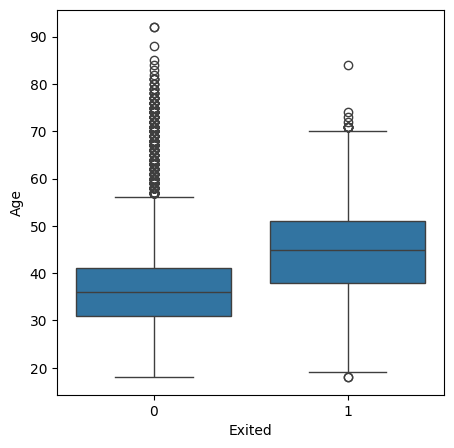

In [40]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Age
plt.show()

#### Exited Vs Tenure

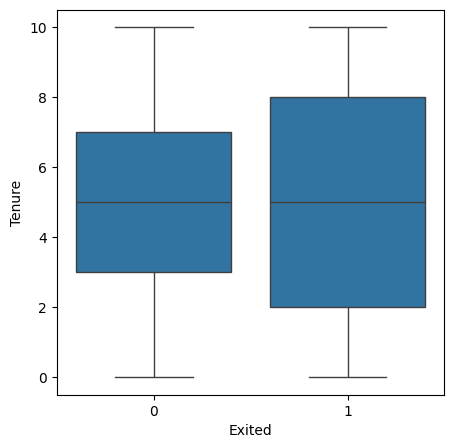

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Tenure
plt.show()

#### Exited Vs Balance

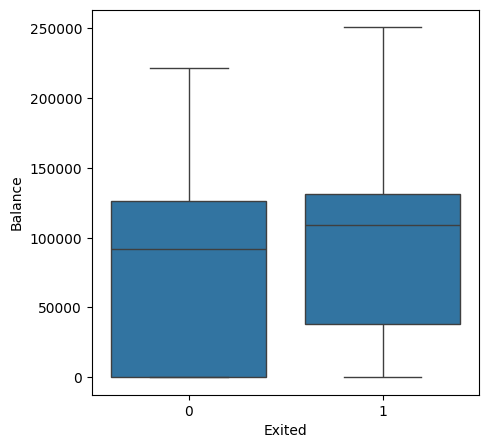

In [42]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Balance
plt.show()

#### Exited Vs Number of Products

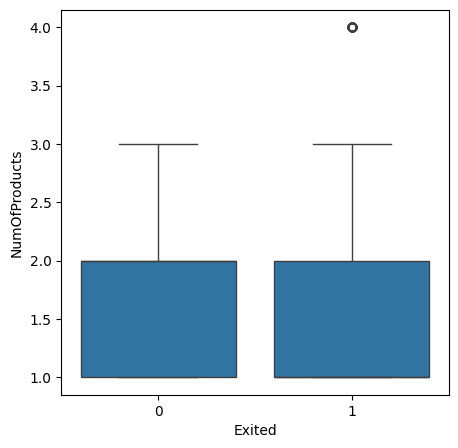

In [43]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Number of products
plt.show()

#### Exited Vs Estimated Salary

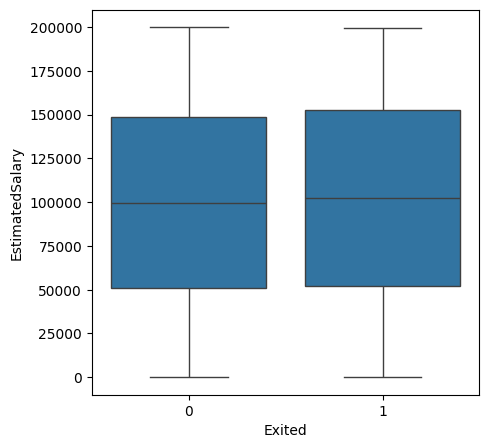

In [44]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Salary
plt.show()

## Data Preprocessing

### Train-validation-test Split

In [45]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [46]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [47]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.10, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [48]:
print(X_train.shape, X_val.shape, X_test.shape)

(7200, 10) (800, 10) (2000, 10)


In [49]:
print(y_train.shape, y_val.shape, y_test.shape)

(7200,) (800,) (2000,)


In [50]:

print(y_train.value_counts(), y_val.value_counts(), y_test.value_counts())

0    5733
1    1467
Name: Exited, dtype: int64 0    637
1    163
Name: Exited, dtype: int64 0    1593
1     407
Name: Exited, dtype: int64


### Dummy Variable Creation

In [51]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)   ## Complete the code to encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)     ## Complete the code to encode Geography and Gender in validation set

### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [52]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])    ## Complete the code to specify the columns to normalize
X_test[cols_list] = sc.transform(X_test[cols_list])    ## Complete the code to specify the columns to normalize

In [53]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
X_val=np.asarray(X_val).astype(np.float32)
y_val=np.asarray(y_val).astype(np.float32)

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


**Let's create a function for plotting the confusion matrix**



In [54]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [55]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [56]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [57]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [58]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [59]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss=losses.binary_crossentropy,optimizer=optimizer,metrics=[metric])
#model_0.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=[metric])

In [60]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Fitting the ANN
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=128,    ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=100,    ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/100
57/57 [==============================] - 2s 8ms/step - loss: 0.6404 - recall: 0.1534 - val_loss: 0.6292 - val_recall: 0.0798
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.6164 - recall: 0.0620 - val_loss: 0.6079 - val_recall: 0.0307
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5968 - recall: 0.0211 - val_loss: 0.5904 - val_recall: 0.0000e+00
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5805 - recall: 0.0075 - val_loss: 0.5761 - val_recall: 0.0000e+00
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5672 - recall: 0.0020 - val_loss: 0.5640 - val_recall: 0.0000e+00
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5559 - recall: 0.0014 - val_loss: 0.5540 - val_recall: 0.0000e+00
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5466 - recall: 6.8166e-04 - val_loss: 0.5456 - val_recall: 0.0000e+00
Epoch 8/100
57/57

**Loss function**

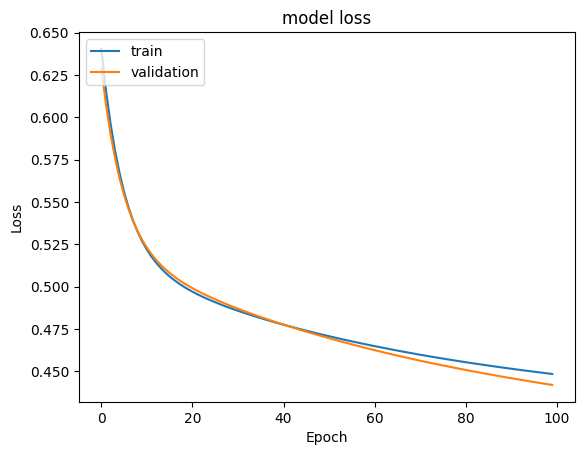

In [62]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

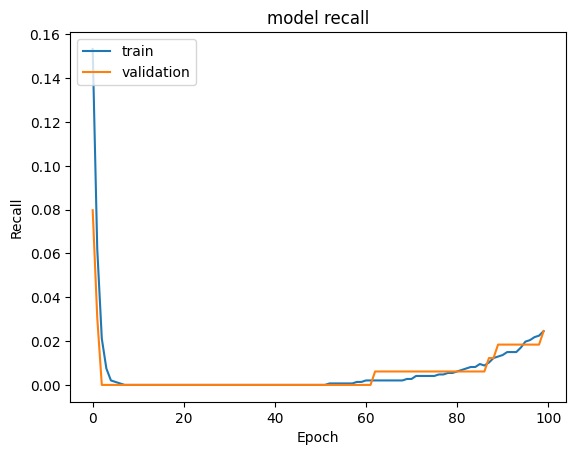

In [63]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [64]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

225/225 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [65]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

25/25 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [66]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [67]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      5733
         1.0       0.72      0.02      0.05      1467

    accuracy                           0.80      7200
   macro avg       0.76      0.51      0.47      7200
weighted avg       0.78      0.80      0.72      7200



In [68]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89       637
         1.0       0.50      0.02      0.05       163

    accuracy                           0.80       800
   macro avg       0.65      0.51      0.47       800
weighted avg       0.74      0.80      0.71       800



**Confusion matrix**

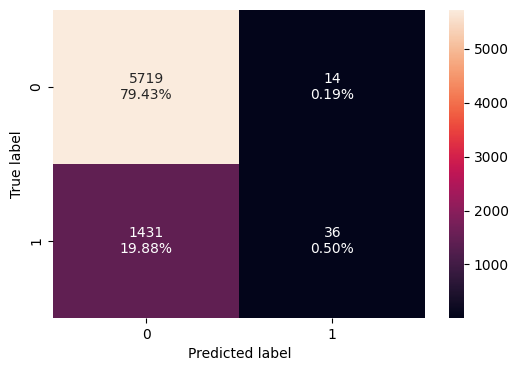

In [69]:
make_confusion_matrix(y_train, y_train_pred)

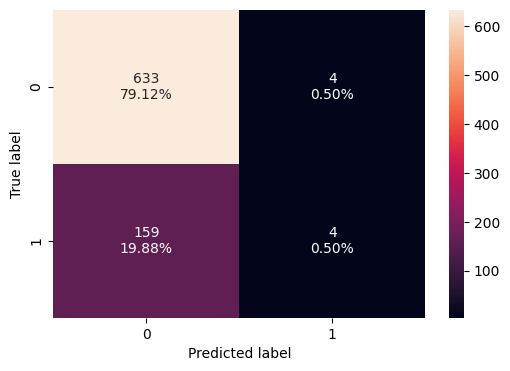

In [70]:
make_confusion_matrix(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [71]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [72]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [73]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [74]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss=losses.binary_crossentropy,optimizer=optimizer,metrics=[metric])

In [75]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=128, ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/100
57/57 [==============================] - 1s 7ms/step - loss: 0.4929 - recall: 0.0170 - val_loss: 0.4318 - val_recall: 0.0613
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.4297 - recall: 0.1595 - val_loss: 0.4104 - val_recall: 0.2086
Epoch 3/100
57/57 [==============================] - 0s 7ms/step - loss: 0.4176 - recall: 0.2277 - val_loss: 0.4052 - val_recall: 0.2209
Epoch 4/100
57/57 [==============================] - 1s 11ms/step - loss: 0.4095 - recall: 0.2584 - val_loss: 0.3945 - val_recall: 0.2761
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 0.4018 - recall: 0.3013 - val_loss: 0.3935 - val_recall: 0.2270
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.3954 - recall: 0.3286 - val_loss: 0.3816 - val_recall: 0.3190
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.3896 - recall: 0.3333 - val_loss: 0.3767 - val_recall: 0.3804
Epoch 8/100
57/57 [=====================

**Loss function**

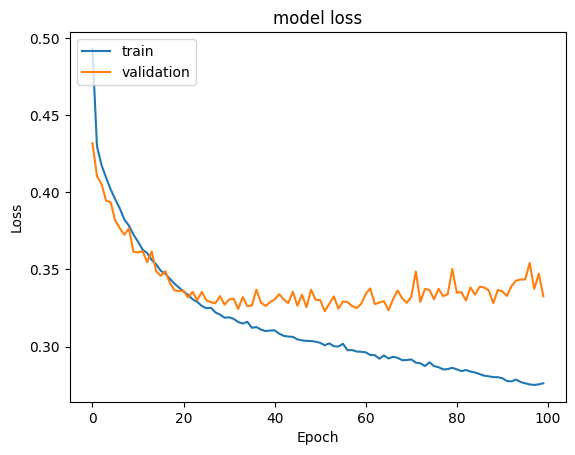

In [77]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

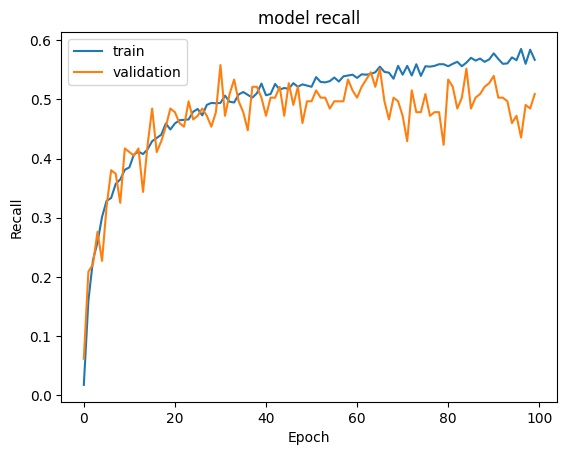

In [78]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [79]:
#Predicting the results using 0.5 as the threshold
y_train_pred=model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

225/225 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [80]:
#Predicting the results using 0.5 as the threshold
y_val_pred=model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

25/25 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [81]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [82]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      5733
         1.0       0.78      0.60      0.68      1467

    accuracy                           0.88      7200
   macro avg       0.84      0.78      0.81      7200
weighted avg       0.88      0.88      0.88      7200



In [83]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       637
         1.0       0.75      0.51      0.61       163

    accuracy                           0.86       800
   macro avg       0.82      0.73      0.76       800
weighted avg       0.86      0.86      0.85       800



**Confusion matrix**

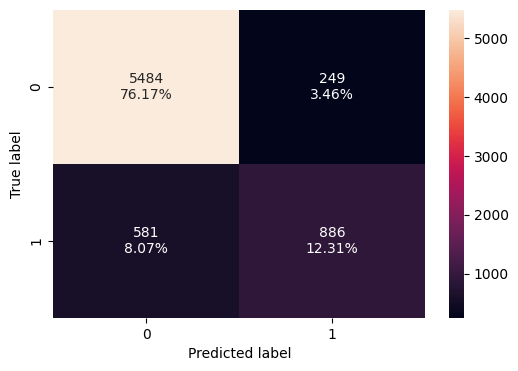

In [84]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

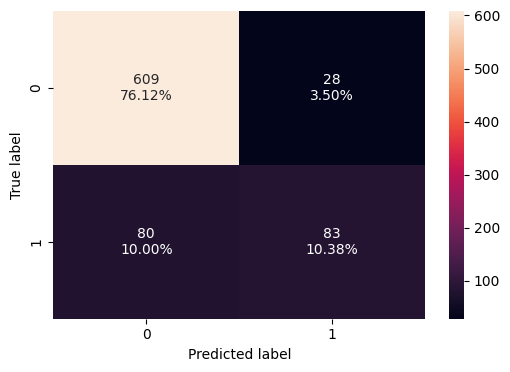

In [85]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Adam Optimizer and Dropout

In [86]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [87]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(8,activation='relu'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(4,activation='relu'))
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'linear'))

In [88]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [89]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss=losses.binary_crossentropy,optimizer=optimizer,metrics=[metric])

In [90]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5

In [91]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ##Complete the code to specify the batch size.
    epochs=100, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
225/225 [==============================] - 2s 4ms/step - loss: 3.1381 - recall: 0.0000e+00 - val_loss: 3.1428 - val_recall: 0.0000e+00
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 3.1367 - recall: 0.0000e+00 - val_loss: 3.1428 - val_recall: 0.0000e+00
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 3.1193 - recall: 0.0000e+00 - val_loss: 3.1290 - val_recall: 0.0000e+00
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.8668 - recall: 0.0020 - val_loss: 0.4548 - val_recall: 0.0061
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4759 - recall: 0.0348 - val_loss: 0.4365 - val_recall: 0.0245
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4541 - recall: 0.0777 - val_loss: 0.4183 - val_recall: 0.0307
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4558 - recall: 0.0859 - val_loss: 0.4117 - val_recall: 0.0675
Epo

**Loss function**

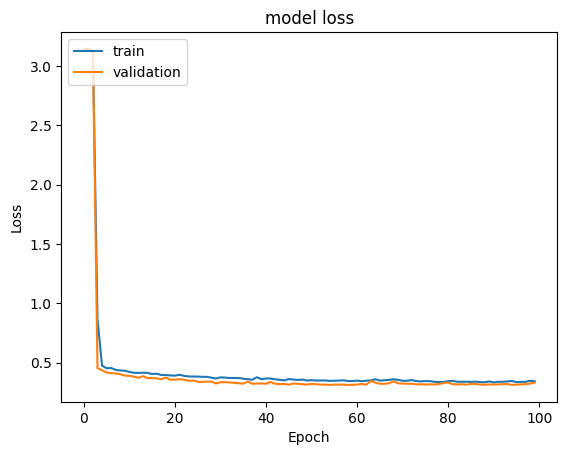

In [92]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

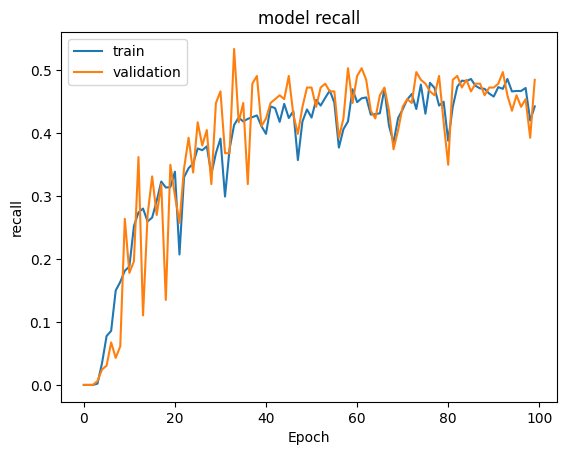

In [93]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [94]:
#Predicting the results using best as a threshold
y_train_pred=model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

225/225 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [95]:
#Predicting the results using 0.5 as the threshold.
y_val_pred=model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

25/25 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [96]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [97]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      5733
         1.0       0.82      0.46      0.59      1467

    accuracy                           0.87      7200
   macro avg       0.85      0.72      0.76      7200
weighted avg       0.86      0.87      0.85      7200



In [98]:
#classification report
cr = classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       637
         1.0       0.85      0.48      0.62       163

    accuracy                           0.88       800
   macro avg       0.87      0.73      0.77       800
weighted avg       0.87      0.88      0.86       800



**Confusion matrix**

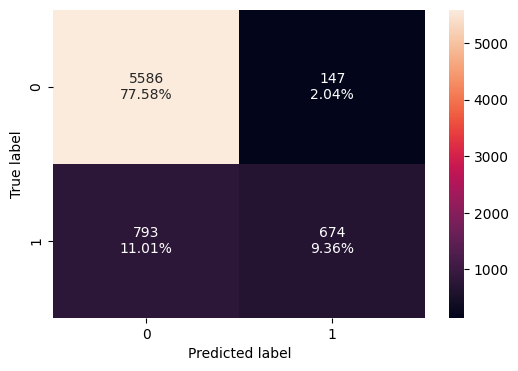

In [99]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

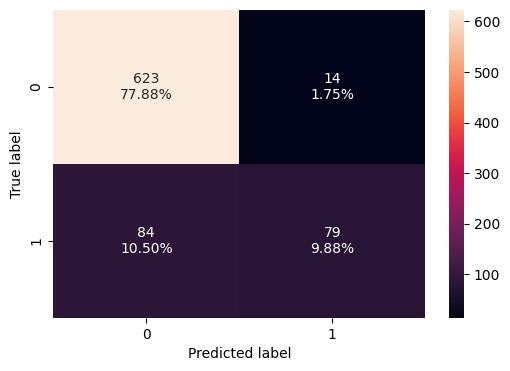

In [100]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [101]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (11466, 11)
After UpSampling, the shape of train_y: (11466,) 



Let's build a model with the balanced dataset

In [102]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [103]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [104]:
#Complete the code to use SGD as the optimizer.
#optimizer = tf.keras.optimizers.____(0.001)
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [105]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
#model_3.compile(loss='___',optimizer=optimizer,metrics=[metric])
model_3.compile(loss=losses.binary_crossentropy,optimizer=optimizer,metrics=[metric])

In [106]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=128, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
90/90 [==============================] - 2s 10ms/step - loss: 0.7025 - recall: 0.9447 - val_loss: 0.7416 - val_recall: 0.9509
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.7014 - recall: 0.9417 - val_loss: 0.7381 - val_recall: 0.9509
Epoch 3/100
90/90 [==============================] - 1s 6ms/step - loss: 0.7004 - recall: 0.9391 - val_loss: 0.7348 - val_recall: 0.9325
Epoch 4/100
90/90 [==============================] - 1s 10ms/step - loss: 0.6995 - recall: 0.9360 - val_loss: 0.7316 - val_recall: 0.9264
Epoch 5/100
90/90 [==============================] - 0s 5ms/step - loss: 0.6987 - recall: 0.9320 - val_loss: 0.7287 - val_recall: 0.9202
Epoch 6/100
90/90 [==============================] - 0s 5ms/step - loss: 0.6979 - recall: 0.9292 - val_loss: 0.7260 - val_recall: 0.9202
Epoch 7/100
90/90 [==============================] - 1s 6ms/step - loss: 0.6971 - recall: 0.9269 - val_loss: 0.7234 - val_recall: 0.9202
Epoch 8/100
90/90 [====================

**Loss function**

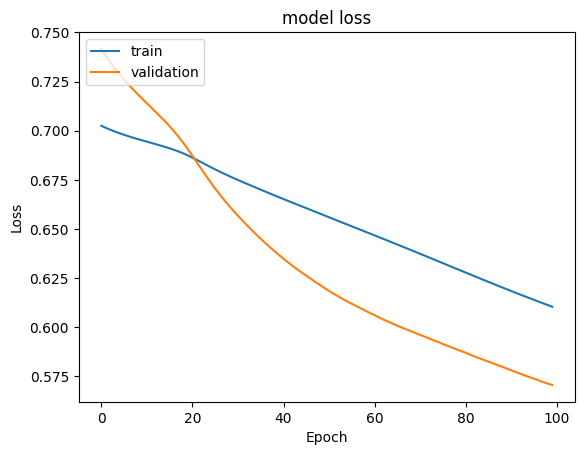

In [108]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

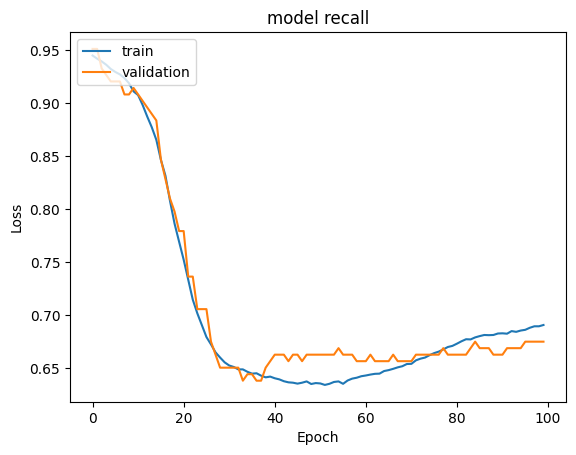

In [109]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [110]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

359/359 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [111]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

25/25 [==============================] - 0s 1ms/step


array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [112]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [113]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.69      0.68      0.68      5733
         1.0       0.68      0.69      0.69      5733

    accuracy                           0.69     11466
   macro avg       0.69      0.69      0.69     11466
weighted avg       0.69      0.69      0.69     11466



In [114]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79       637
         1.0       0.37      0.67      0.48       163

    accuracy                           0.70       800
   macro avg       0.63      0.69      0.64       800
weighted avg       0.79      0.70      0.73       800



**Confusion matrix**

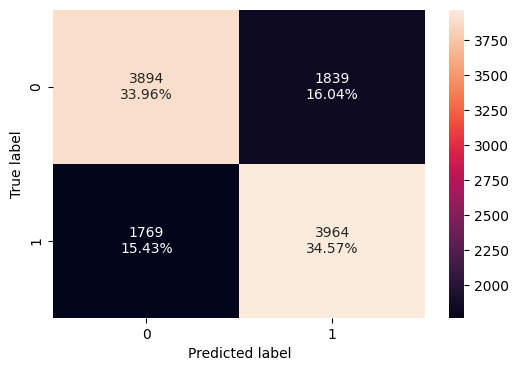

In [115]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

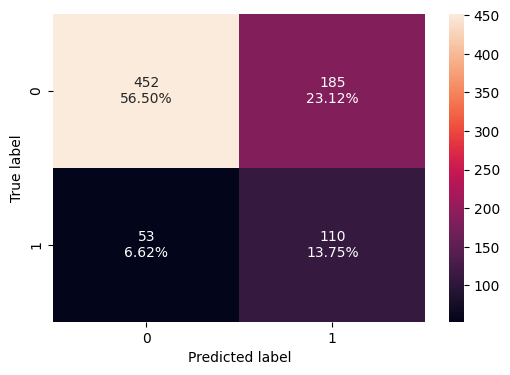

In [116]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [117]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [118]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'linear'))

In [119]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [121]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
#model_4.compile(loss='___',optimizer=optimizer,metrics=[metric])
model_4.compile(loss=losses.binary_crossentropy,optimizer=optimizer,metrics=[metric])

In [122]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=128, ## Complete the code to specify the batch size to use
    epochs=100,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
90/90 [==============================] - 2s 6ms/step - loss: 0.7757 - recall: 0.2671 - val_loss: 0.5997 - val_recall: 0.5828
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 0.6568 - recall: 0.5524 - val_loss: 0.5696 - val_recall: 0.5890
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 0.6237 - recall: 0.5772 - val_loss: 0.5531 - val_recall: 0.6319
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 0.5976 - recall: 0.6456 - val_loss: 0.5470 - val_recall: 0.6810
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 0.5707 - recall: 0.6886 - val_loss: 0.4978 - val_recall: 0.6687
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 0.5469 - recall: 0.7157 - val_loss: 0.5322 - val_recall: 0.7178
Epoch 7/100
90/90 [==============================] - 0s 4ms/step - loss: 0.5431 - recall: 0.7368 - val_loss: 0.5702 - val_recall: 0.7791
Epoch 8/100
90/90 [======================

**Loss function**

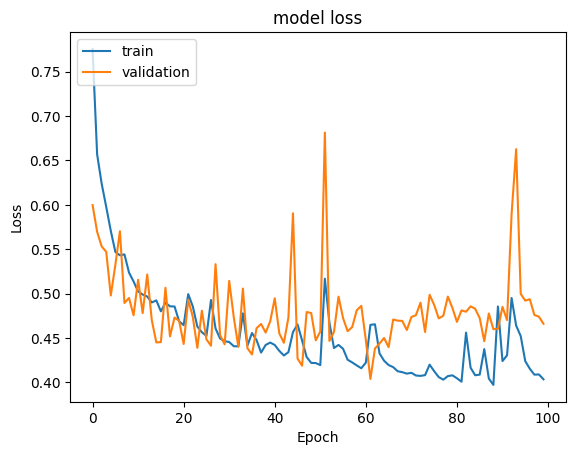

In [124]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

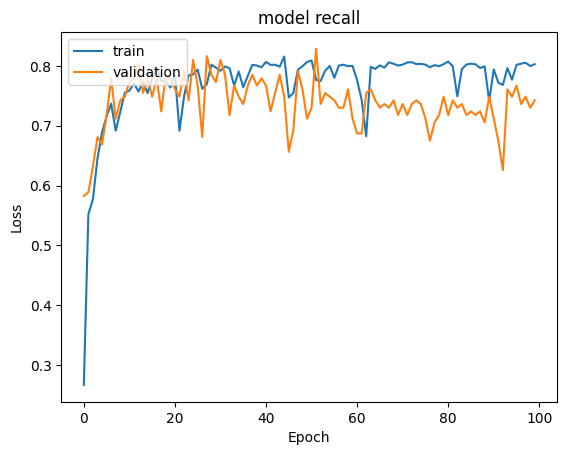

In [125]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [126]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

359/359 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [127]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

25/25 [==============================] - 0s 3ms/step


array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

In [128]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [129]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81      5733
         1.0       0.82      0.81      0.81      5733

    accuracy                           0.81     11466
   macro avg       0.81      0.81      0.81     11466
weighted avg       0.81      0.81      0.81     11466



In [130]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       637
         1.0       0.53      0.74      0.62       163

    accuracy                           0.81       800
   macro avg       0.73      0.79      0.75       800
weighted avg       0.85      0.81      0.82       800



**Confusion matrix**

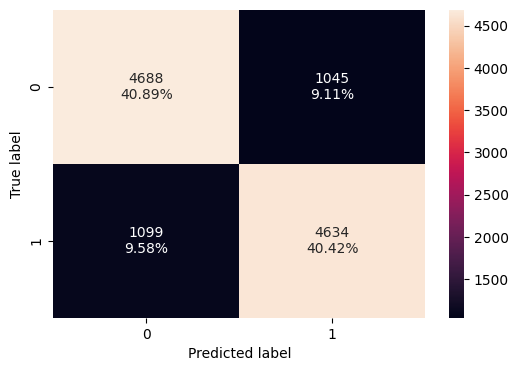

In [131]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

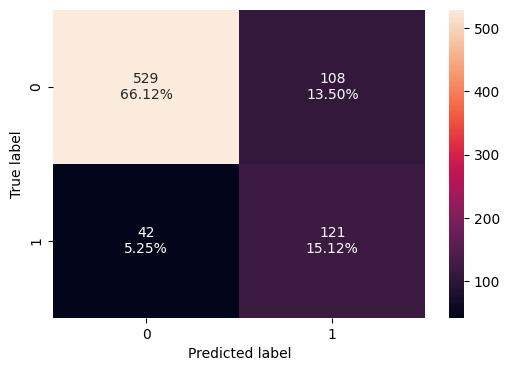

In [132]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [133]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [134]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.2))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(16,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'linear'))

In [135]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [136]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
#model_5.compile(loss='___',optimizer=optimizer,metrics=[metric])
model_5.compile(loss=losses.binary_crossentropy,optimizer=optimizer,metrics=[metric])

In [137]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [138]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=64, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/100
180/180 [==============================] - 3s 7ms/step - loss: 0.8733 - recall: 0.3168 - val_loss: 0.5513 - val_recall: 0.3620
Epoch 2/100
180/180 [==============================] - 1s 5ms/step - loss: 0.6963 - recall: 0.5015 - val_loss: 0.4909 - val_recall: 0.2761
Epoch 3/100
180/180 [==============================] - 1s 5ms/step - loss: 0.6702 - recall: 0.5297 - val_loss: 0.4942 - val_recall: 0.4785
Epoch 4/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6386 - recall: 0.5679 - val_loss: 0.4737 - val_recall: 0.4663
Epoch 5/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6256 - recall: 0.5747 - val_loss: 0.4707 - val_recall: 0.5337
Epoch 6/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6059 - recall: 0.6220 - val_loss: 0.4714 - val_recall: 0.5706
Epoch 7/100
180/180 [==============================] - 0s 3ms/step - loss: 0.5965 - recall: 0.6388 - val_loss: 0.4584 - val_recall: 0.5521
Epoch 8/100
180/180 [======

**Loss function**

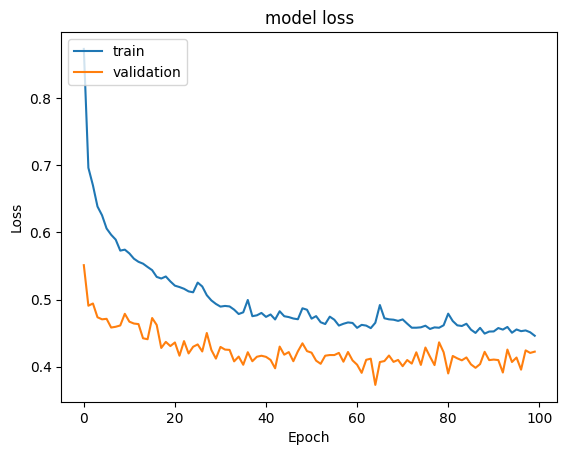

In [139]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

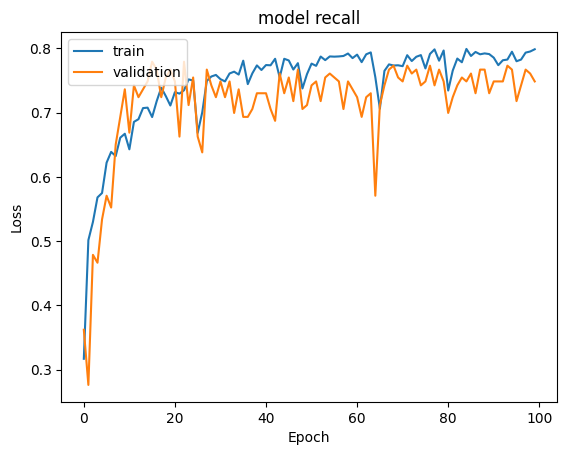

In [140]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [141]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

359/359 [==============================] - 1s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [142]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

25/25 [==============================] - 0s 3ms/step


array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [143]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [144]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      5733
         1.0       0.81      0.81      0.81      5733

    accuracy                           0.81     11466
   macro avg       0.81      0.81      0.81     11466
weighted avg       0.81      0.81      0.81     11466



In [145]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       637
         1.0       0.53      0.75      0.62       163

    accuracy                           0.81       800
   macro avg       0.73      0.79      0.75       800
weighted avg       0.85      0.81      0.82       800



**Confusion matrix**

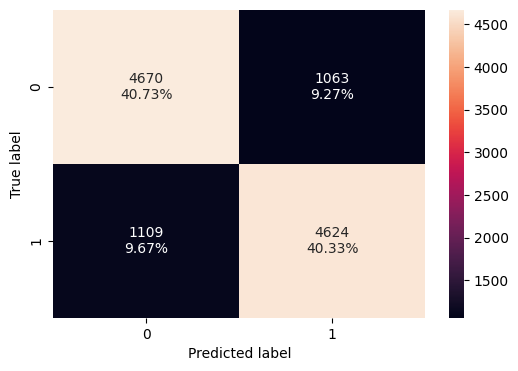

In [146]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

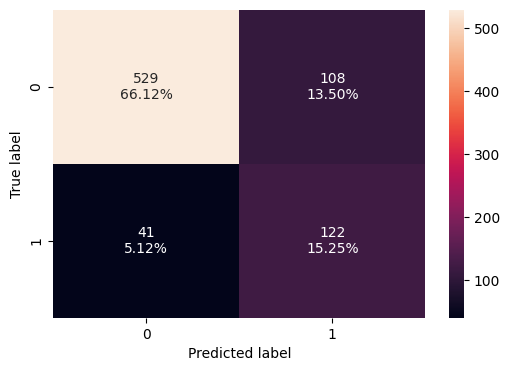

In [147]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [148]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.024540
NN with Adam,0.603954
NN with Adam & Dropout,0.459441
NN with SMOTE & SGD,0.691436
NN with SMOTE & Adam,0.808303
"NN with SMOTE,Adam & Dropout",0.806559


In [149]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.024540
NN with Adam,0.509202
NN with Adam & Dropout,0.484663
NN with SMOTE & SGD,0.674847
NN with SMOTE & Adam,0.742331
"NN with SMOTE,Adam & Dropout",0.748466


In [150]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.000000
NN with Adam,0.094751
NN with Adam & Dropout,-0.025222
NN with SMOTE & SGD,0.016589
NN with SMOTE & Adam,0.065972
"NN with SMOTE,Adam & Dropout",0.058092


In [151]:
y_test_pred = model_5.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 0s 3ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [152]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86      1593
         1.0       0.50      0.75      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



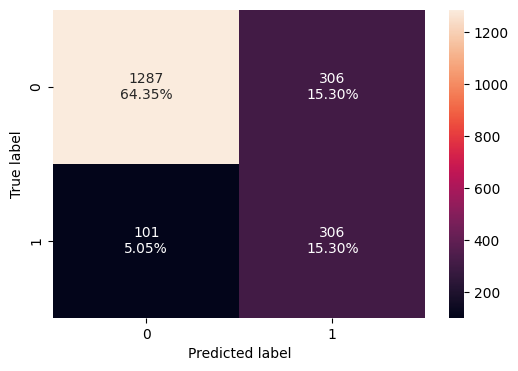

In [153]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

* Data engineers of the bank need to work with the neural network model by changing the number
of dense layers, learning rate, and number of neurons in hidden layers. Can try out different loss
and activation functions and see if the recall score can be improved.
* Models must be retrained on a real-time basis, or a requirement basis based on business priority.
* Customers in Germany have higher chances of churning compared to Spain and France. Hence banks can try to come up with region-specific plans or campaigns based on customer feedback or requirements.
* Since gender and age play important features, specific campaigns or offers can be designed for female customers or different age categories.


